In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\hp\Downloads\netflix1.csv")

In [3]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
print("Shape of dataset:", data.shape)
print("\nColumn Names:", data.columns.tolist())
print("\nDataset Info:")
print(data.info())

Shape of dataset: (8790, 10)

Column Names: ['show_id', 'type', 'title', 'director', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None


In [5]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data['duration_minutes'] = data['duration'].apply(
    lambda x: int(x.split()[0]) if pd.notnull(x) and 'min' in x else None)

data['duration_seasons'] = data['duration'].apply(
    lambda x: int(x.split()[0]) if pd.notnull(x) and 'Season' in x else None)

data['standard_duration'] = data['duration_minutes'].fillna(data['duration_seasons'] * 60)
data[['type', 'title', 'duration', 'duration_minutes', 'duration_seasons', 'standard_duration']].head(10)

,type,title,duration,duration_minutes,duration_seasons,standard_duration
0,Movie,Dick Johnson Is Dead,90 min,90.0,NaN,90.0
1,TV Show,Ganglands,1 Season,NaN,1.0,60.0
2,TV Show,Midnight Mass,1 Season,NaN,1.0,60.0
3,Movie,Confessions of an Invisible Girl,91 min,91.0,NaN,91.0
4,Movie,Sankofa,125 min,125.0,NaN,125.0
5,TV Show,The Great British Baking Show,9 Seasons,NaN,9.0,540.0
6,Movie,The Starling,104 min,104.0,NaN,104.0
7,Movie,Motu Patlu in the Game of Zones,87 min,87.0,NaN,87.0
8,Movie,Je Suis Karl,127 min,127.0,NaN,127.0
9,Movie,Motu Patlu in Wonderland,76 min,76.0,NaN,76.0


In [8]:
plt.style.use('dark_background')
netflix_reds = ["#E50914", "#FF3333", "#FF6666",  "#FF9999"]  

C:\Users\hp\AppData\Local\Temp\ipykernel_22232\1400990540.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="type",palette=netflix_reds)
C:\Users\hp\AppData\Local\Temp\ipykernel_22232\1400990540.py:1: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(data=data, x="type",palette=netflix_reds)


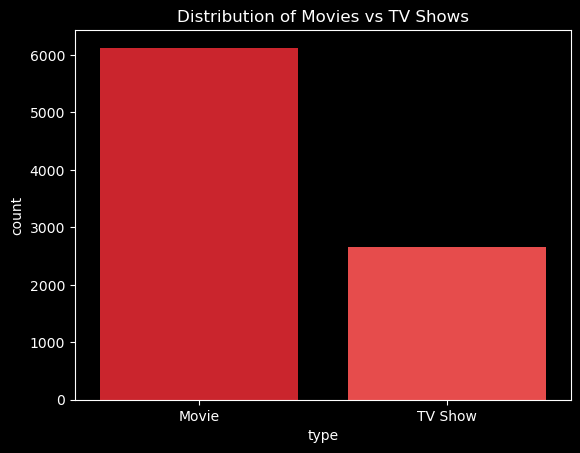

In [9]:
sns.countplot(data=data, x="type",palette=netflix_reds)
plt.title("Distribution of Movies vs TV Shows")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_22232\1387703769.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index,  palette=netflix_reds)
C:\Users\hp\AppData\Local\Temp\ipykernel_22232\1387703769.py:2: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_countries.values, y=top_countries.index,  palette=netflix_reds)


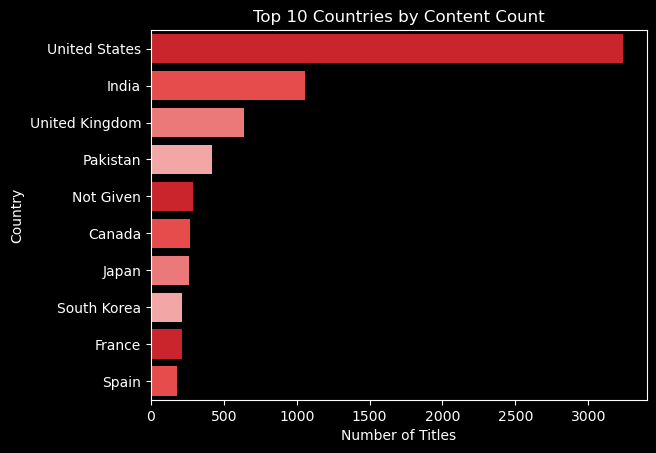

In [10]:
top_countries = data['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index,  palette=netflix_reds)
plt.title("Top 10 Countries by Content Count")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

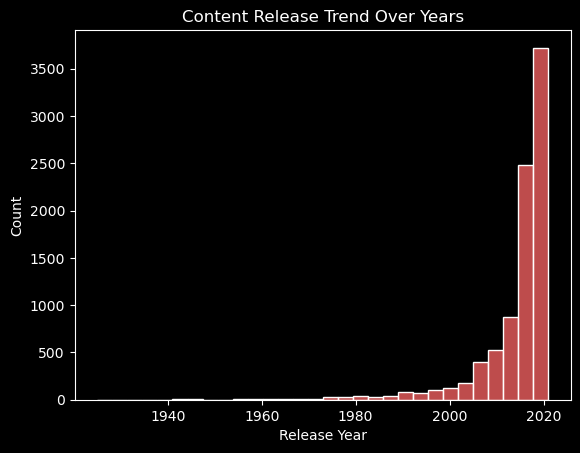

In [11]:
sns.histplot(data['release_year'], bins=30, kde=False,color="#FF6666")
plt.title("Content Release Trend Over Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_22232\4284486741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values,  palette=netflix_reds)
C:\Users\hp\AppData\Local\Temp\ipykernel_22232\4284486741.py:2: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=rating_counts.index, y=rating_counts.values,  palette=netflix_reds)


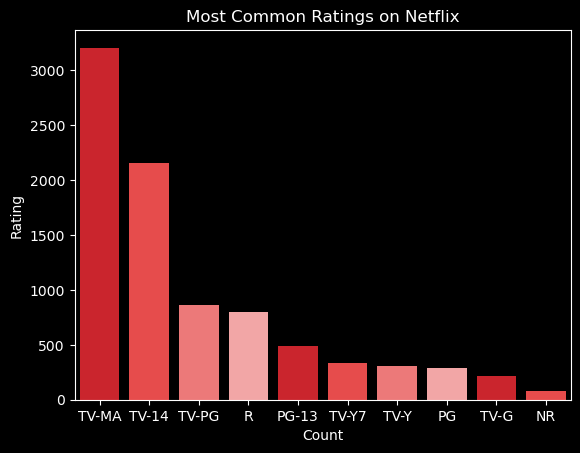

In [12]:
rating_counts = data['rating'].value_counts().head(10)
sns.barplot(x=rating_counts.index, y=rating_counts.values,  palette=netflix_reds)
plt.title("Most Common Ratings on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_22232\2509309989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_movies['duration'] = data_movies['duration'].str.replace(" min","").astype(float)


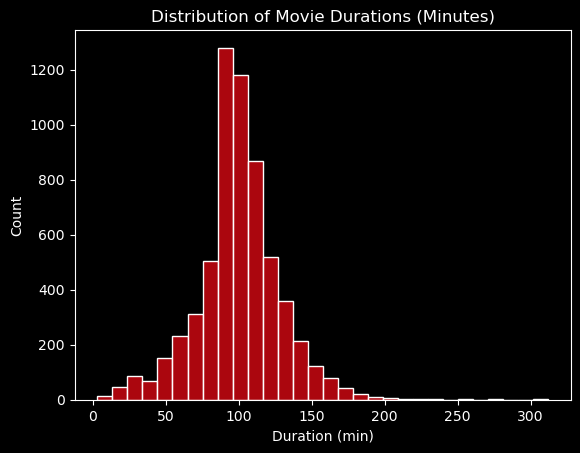

In [13]:
data_movies = data[data['type']=="Movie"]
data_movies['duration'] = data_movies['duration'].str.replace(" min","").astype(float)
sns.histplot(data_movies['duration'], bins=30,color="#E50914")
plt.title("Distribution of Movie Durations (Minutes)")
plt.xlabel("Duration (min)")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_22232\3016302188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_shows['duration'] = data_shows['duration'].str.replace(" Season","").str.replace("s","")
C:\Users\hp\AppData\Local\Temp\ipykernel_22232\3016302188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_shows['duration'] = data_shows['duration'].astype(int)
C:\Users\hp\AppData\Local\Temp\ipykernel_22232\3016302188.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

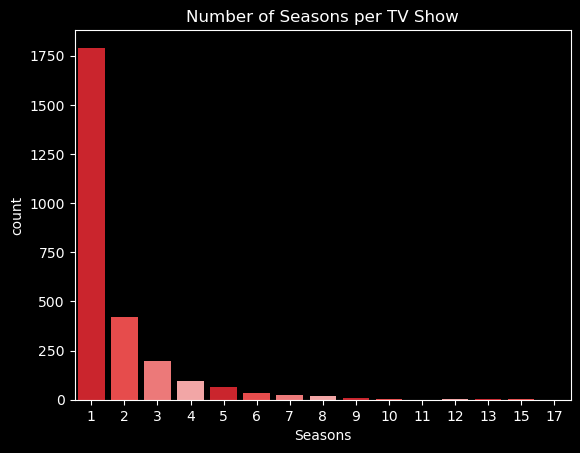

In [14]:
data_shows = data[data['type']=="TV Show"]
data_shows['duration'] = data_shows['duration'].str.replace(" Season","").str.replace("s","")
data_shows['duration'] = data_shows['duration'].astype(int)
sns.countplot(x=data_shows['duration'], palette=netflix_reds)
plt.title("Number of Seasons per TV Show")
plt.xlabel("Seasons")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_22232\3691495525.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Genre", data=genre_data,palette=netflix_reds)
C:\Users\hp\AppData\Local\Temp\ipykernel_22232\3691495525.py:7: UserWarning: 
The palette list has fewer values (4) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Count", y="Genre", data=genre_data,palette=netflix_reds)


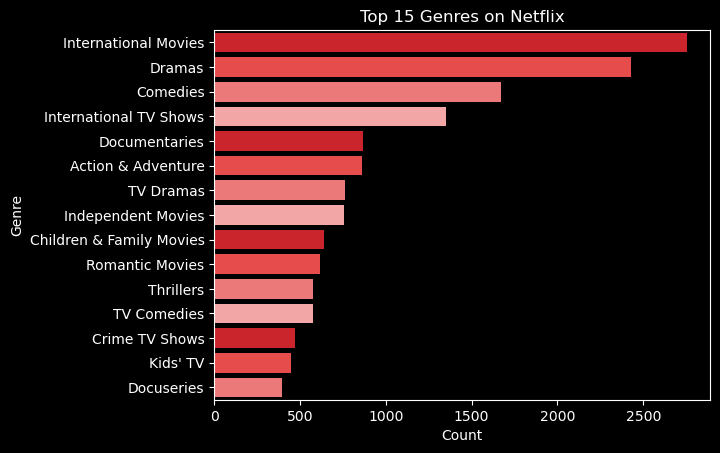

In [15]:
from collections import Counter
genres = []
data['listed_in'].dropna().apply(lambda x: genres.extend(x.split(", ")))
genre_counts = Counter(genres).most_common(15)
genre_data = pd.DataFrame(genre_counts, columns=["Genre","Count"])

sns.barplot(x="Count", y="Genre", data=genre_data,palette=netflix_reds)
plt.title("Top 15 Genres on Netflix")
plt.show()